# Just checking how to read in numpy arrays from saved numpy files

In [1]:
import numpy as np
import os
# import tensorflow as tf
# from tensorflow import keras
import keras

Using TensorFlow backend.
C:\Users\Nick\AppData\Local\Continuum\anaconda3\envs\envCartPole\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Nick\AppData\Local\Continuum\anaconda3\envs\envCartPole\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Nick\AppData\Local\Continuum\anaconda3\envs\envCartPole\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint1

In [2]:
# Numpy saved array format:
#     [qx, qy, qthb, qthlt, qthlb, dqx, dqy, dqthb, dqthlt, dqthlb, vx, hm, tauh, tauk]

qx_ar = np.array([])
qy_ar = np.array([])
qthb_ar = np.array([])
qthlt_ar = np.array([])
qthlb_ar = np.array([])
dqx_ar = np.array([])
dqy_ar = np.array([])
dqthb_ar = np.array([])
dqthlt_ar = np.array([])
dqthlb_ar = np.array([])
vx_ar = np.array([]) 
hm_ar = np.array([]) 
tauh_ar = np.array([]) 
tauk_ar = np.array([])

filebase = os.getcwd()
filepath = filebase + r'\\Datasets\\test3\\'
print("Directory: ", filepath)

count = 0

for file in os.listdir(filepath):
    filename = os.fsdecode(file)
    if filename.endswith(".npy"):  # import all stored values
        fileall = os.path.join(filepath, filename)
        print("Filename: ", filename)
        qx, qy, qthb, qthlt, qthlb, dqx, dqy, dqthb, dqthlt, dqthlb, vx_avg, hm, tauh, tauk = np.load(fileall, allow_pickle = True)
        
        N = len(qx)
        
        vx = vx_avg*np.ones(N)
        
        qx_ar = np.append(qx_ar, qx)
        qy_ar = np.append(qy_ar, qy)
        qthb_ar = np.append(qthb_ar, qthb)
        qthlt_ar = np.append(qthlt_ar, qthlt)
        qthlb_ar = np.append(qthlb_ar, qthlb)
        dqx_ar = np.append(dqx_ar, dqx)
        dqy_ar = np.append(dqy_ar, dqy)
        dqthb_ar = np.append(dqthb_ar, dqthb)
        dqthlt_ar = np.append(dqthlt_ar, dqthlt)
        dqthlb_ar = np.append(dqthlb_ar, dqthlb)
        vx_ar = np.append(vx_ar, vx)
        hm_ar = np.append(hm_ar, hm)
        tauh_ar = np.append(tauh_ar, tauh)
        tauk_ar = np.append(tauk_ar, tauk)

    else:
        continue

Directory:  C:\Users\Nick\Google Drive\PythonPrograms\machine_learning_projects\ReinforcementLearning_Monopod\\Datasets\\test3\\
Filename:  iter_10_n1ms.npy
Filename:  iter_11_p1ms.npy
Filename:  iter_12_p4ms.npy
Filename:  iter_13_p4ms.npy
Filename:  iter_14_n1ms.npy
Filename:  iter_15_p4ms.npy
Filename:  iter_17_p2ms.npy
Filename:  iter_18_p3ms.npy
Filename:  iter_19_n4ms.npy
Filename:  iter_1_n1ms.npy
Filename:  iter_20_p2ms.npy
Filename:  iter_2_p3ms.npy
Filename:  iter_3_p0ms.npy
Filename:  iter_4_n1ms.npy
Filename:  iter_5_p0ms.npy
Filename:  iter_6_n3ms.npy
Filename:  iter_7_n1ms.npy
Filename:  iter_8_p3ms.npy
Filename:  iter_9_n4ms.npy


In [3]:
# Reshape training data and training labels
train_data = np.stack((qx_ar, qy_ar, qthb_ar, qthlt_ar, qthlb_ar,
                       dqx_ar, dqy_ar, dqthb_ar, dqthlt_ar, dqthlb_ar,
                       vx_ar, hm_ar), axis = 1) # combine arrays to training data

train_data = np.reshape(train_data,(train_data.shape[0],train_data.shape[1],1)) # Reshape training data

train_labels = np.stack((tauh_ar, tauk_ar), axis = 1) # combine torques to make training labels

print(train_data.shape)
print(train_labels.shape)

(950, 12, 1)
(950, 2)


In [4]:
# Create Model

input_size = train_data.shape[1] # number of inputs to NN
output_size = train_labels.shape[1] # numer of outputs of NN

model = keras.Sequential([
        keras.layers.Flatten(input_shape=(input_size, 1)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(output_size)
    ])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model.fit(train_data, train_labels, epochs=50) # train the model

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
950/950 [==============================] - 0s 451us/step - loss: 0.0142 - accuracy: 0.6705
Epoch 2/50
950/950 [==============================] - ETA: 0s - loss: 0.0101 - accuracy: 0.76 - 0s 188us/step - loss: 0.0099 - accuracy: 0.7674
Epoch 3/50
950/950 [==============================] - 0s 202us/step - loss: 0.0102 - accuracy: 0.7347
Epoch 4/50
950/950 [==============================] - 0s 190us/step - loss: 0.0087 - accuracy: 0.7853
Epoch 5/50
950/950 [==============================] - 0s 166us/step - loss: 0.0077 - accuracy: 0.8063
Epoch 6/50
950/950 [==============================] - 0s 159us/step - loss: 0.0076 - accuracy: 0.8116
Epoch 7/50
950/950 [==============================] - 0s 152us/step - loss: 0.0082 - accuracy: 0.7842
Epoch 8/50
950/950 [==============================] - 0s 148us/step - loss: 0.0067 - accuracy: 0.7968
Epoch 9/50
950/950 [==============================] - 0s 149us/step - loss: 0.0068 - accuracy:

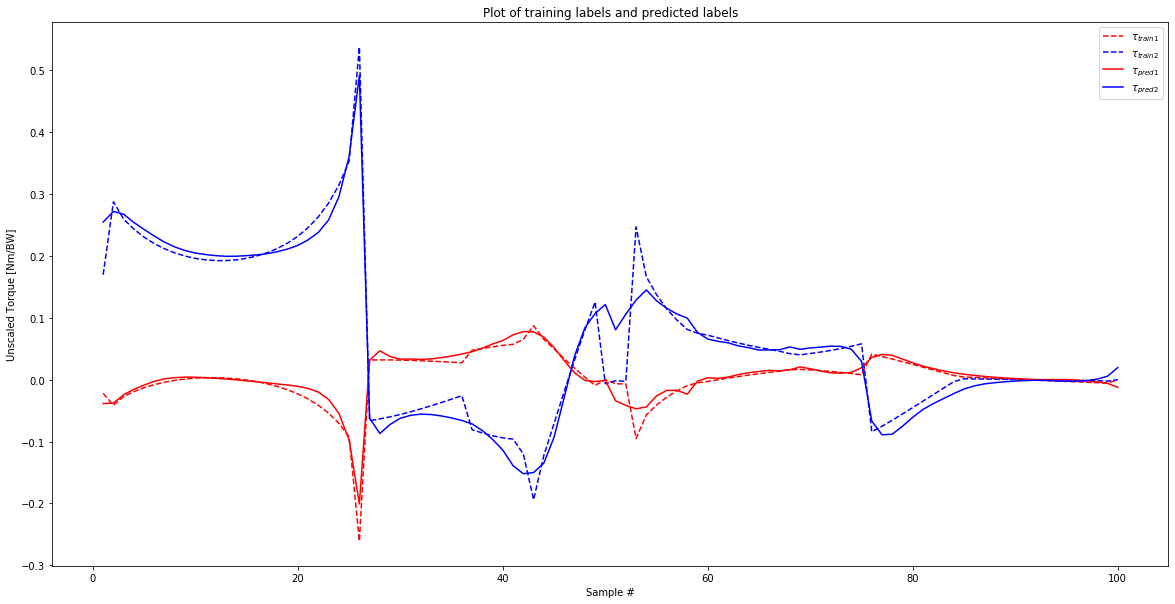

In [7]:
import matplotlib
import matplotlib.pyplot as plt

predictions = model.predict(train_data)
n = np.linspace(1, len(predictions), len(predictions))

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(n[0:100], train_labels[0:100,0], 'r--',n[0:100], train_labels[0:100,1], 'b--')
ax.plot(n[0:100], predictions[0:100,0], 'r-',n[0:100], predictions[0:100,1], 'b-')

ax.set(xlabel='Sample #', ylabel='Unscaled Torque [Nm/BW]',
       title='Plot of training labels and predicted labels');

ax.legend(["$\\tau_{train1}$", "$\\tau_{train2}$","$\\tau_{pred1}$", "$\\tau_{pred2}$"]);


In [32]:
# Forward simulation of results

# Predictions
state_0 = train_data[100] # start of a traj opt solve
states_predicted = [state_0]

states_actual = train_data[100:150]
# states_actual[0][11]

In [36]:
states_predicted[0]

array([[ 2.14337691e-01],
       [ 1.07828722e+00],
       [ 1.67863432e-01],
       [-1.85406222e-01],
       [-6.59921727e-05],
       [ 2.14337691e-01],
       [ 1.07828722e+00],
       [ 1.67863432e-01],
       [-1.85406222e-01],
       [-6.59921727e-05],
       [ 4.00000000e+00],
       [ 0.00000000e+00]])

In [26]:
#animate it
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from IPython.display import HTML
%matplotlib inline

N = 50
lb  = 1.0
llt = 0.5
llb = 0.5

fig1, ax1 = plt.subplots(1,1) #create axes

ax1.set_aspect('equal')

def plot_robot(i,states,ax): #update function for animation
    ax1.clear()
    ax1.set_xlim([-4.0,4.0])
    ax1.set_ylim([0,2])
    ax2.clear()
    ax1.set_xlim([-4.0,4.0])
    ax1.set_ylim([0,2])
    
    x_sim = states[i][0][0]
    y_sim = states[i][1][0]
    thb_sim = states[i][2][0]
    thlt_sim = states[i][3][0]
    thlb_sim = states[i][4][0]
    
    # assign variables
    
    #plot body
    body_xb = x_sim - 0.5*lb*np.cos(thb_sim)
    body_yb = y_sim - 0.5*lb*np.sin(thb_sim)
    body_xf = x_sim + 0.5*lb*np.cos(thb_sim)
    body_yf = y_sim + 0.5*lb*np.sin(thb_sim)  
    ax.plot([body_xb,body_xf],[body_yb,body_yf],color='xkcd:black')
      
    #plot leg 1
    thA1 = thb_sim + thlt_sim
    thA2 = thA1 + thlb_sim 
    leg1_xt = x_sim
    leg1_yt = y_sim
    leg1_xb = x_sim + llt*np.sin(thA1)
    leg1_yb = y_sim - llt*np.cos(thA1)
    ax.plot([leg1_xt,leg1_xb],[leg1_yt,leg1_yb],color='xkcd:black')
    
    #plot leg 2
    leg2_xt = leg1_xb
    leg2_yt = leg1_yb
    leg2_xb = leg1_xb + llb*np.sin(thA2)
    leg2_yb = leg1_yb - llb*np.cos(thA2)
    ax.plot([leg2_xt,leg2_xb],[leg2_yt,leg2_yb],color='xkcd:black')
    
update = lambda i: plot_robot(i,states_actual,ax1) #lambdify update function

animate = ani.FuncAnimation(fig1,update,range(0,N),interval = 50,repeat=True)
plt.close(animate._fig)

HTML(animate.to_html5_video()) #you need to convert the animation to HTML5 to embed it in the notebook


In [16]:
# for i in range(0,N):
#     print(i)